# We Rate Dogs - Data Wrangling Project


## Introduction

Data in the real world rarely comes clean. The aim of this project is to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset that to be wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. The goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive (already provided) is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for detailed analysis and visualizations.


## The Data
Comprising three datasets.

#### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything.


#### Additional Data via the Twitter API

Data gathered from Twitter's API to get retweet count and favorite count.

#### Image Predictions File

A table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) based on classification of dog breeds leveraging neural networks.


#### Key Points

- I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Requirements are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
-  Tweets beyond August 1st, 2017 will not be gathered as the image predictions for these tweets are unavailabe and there is no access to the algorithm used.

## Data Gathering

**Enhanced Twitter Archive**: File will be downloaded file using the link provided.

**Image Prediction File**: Hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv 

**Additional Data via Twitter API**: Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minbimum) tweet ID, retweet count, and favorite count.

In [1]:
pip install tweepy==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tweepy
import requests
import json
import seaborn as sns

###### Getting data from Twitter archive already provided

In [3]:
#Reading the CSV file
twitter_archive = pd.read_csv('/Users/ifunanya/Downloads/twitter-archive-enhanced.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

##### Downloading data programmatically using URL

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects = True)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)


# Reading the TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [5]:
consumer_key = '***********'
consumer_secret = '***********'
access_token = '***********'
access_secret = '***********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                parser = tweepy.parsers.JSONParser(),
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [6]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
tweet_ids = []
# Tweets that can't be found are saved in the list below:
notweets_for_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        data = (api.get_status(tweet_id))
        list_of_tweets.append(data)
        tweet_ids.append(tweet_id)
    except Exception as e:
        notweets_for_ids.append(tweet_id)

In [7]:
print('Tweets in list:', len(list_of_tweets))
print('Tweets with IDs:', len(tweet_ids))
print('No tweets for Ids:', len(notweets_for_ids))

Tweets in list: 2324
Tweets with IDs: 2324
No tweets for Ids: 32


In [8]:
#isolating each json tweet

json_tweets = []
for each_json_tweet in list_of_tweets:
    json_tweets.append(each_json_tweet)

In [9]:
#writing into a txt file

with open('tweet_json.txt', 'w') as f:
    json.dump(json_tweets, f)

In [10]:
# Loading the Twitter API data
action_counts = pd.read_json('tweet_json.txt')
action_counts['tweet_id'] = tweet_ids
action_counts= action_counts[['tweet_id', 'favorite_count', 'retweet_count']]

In [11]:
print(action_counts.head())
print(len(action_counts))

             tweet_id  favorite_count  retweet_count
0  892420643555336193           33809           7009
1  892177421306343426           29326           5301
2  891815181378084864           22046           3481
3  891689557279858688           36934           7225
4  891327558926688256           35307           7760
2324


## Assessing Data

The focus for this section is to assess the data gathered and identify any issues that may be present. This will be done both visually and programmatically.
The aim is to identify both quality and tidiness issues.

The requirements for quality are:
- Completeness: Identify missing data
- Validity: Check that data present are valid and adequately represent their fields
- Accuracy: Asides validity, is the data correct?
- Consistency: Is it standardized across fields?

Requirements for tidiness are:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

#### Visual Assessment of Data (Looking through each of the data gathered)

In [12]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

In [13]:
image_predictions

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

In [14]:
action_counts

tweet_id  favorite_count  retweet_count
0     892420643555336193           33809           7009
1     892177421306343426           29326           5301
2     891815181378084864           22046           3481
3     891689557279858688           36934           7225
4     891327558926688256           35307           7760
...                  ...             ...            ...
2319  666049248165822465              89             37
2320  666044226329800704             247            115
2321  666033412701032449             100             36
2322  666029285002620928             112             39
2323  666020888022790149            2293            422

[2324 rows x 3 columns]

#### Programmatic assessment of data (Utilising pandas functions and methods for assessment)

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [17]:
twitter_archive.sample(20)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2182  668992363537309700                    NaN                  NaN   
951   751950017322246144                    NaN                  NaN   
1653  683462770029932544                    NaN                  NaN   
670   789986466051088384                    NaN                  NaN   
1461  694925794720792577                    NaN                  NaN   
866   762035686371364864                    NaN                  NaN   
381   827324948884643840                    NaN                  NaN   
2127  670319130621435904                    NaN                  NaN   
373   828376505180889089                    NaN                  NaN   
986   749064354620928000                    NaN                  NaN   
1429  697596423848730625                    NaN                  NaN   
1465  694352839993344000                    NaN                  NaN   
1448  696405997980676096                    NaN                  NaN   
1470  694001791655137281                    NaN                  NaN   
727   782305867769217024                    NaN                  NaN   
328   833722901757046785                    NaN                  NaN   
1096  736365877722001409                    NaN                  NaN   
232   847962785489326080                    NaN                  NaN   
112   870804317367881728                    NaN                  NaN   
1943  673709992831262724                    NaN                  NaN   

                      timestamp  \
2182  2015-11-24 03:19:43 +0000   
951   2016-07-10 01:23:49 +0000   
1653  2016-01-03 01:39:57 +0000   
670   2016-10-23 00:27:05 +0000   
1461  2016-02-03 16:49:55 +0000   
866   2016-08-06 21:20:40 +0000   
381   2017-02-03 01:16:53 +0000   
2127  2015-11-27 19:11:49 +0000   
373   2017-02-05 22:55:23 +0000   
986   2016-07-02 02:17:13 +0000   
1429  2016-02-11 01:42:02 +0000   
1465  2016-02-02 02:53:12 +0000   
1448  2016-02-07 18:51:43 +0000   
1470  2016-02-01 03:38:15 +0000   
727   2016-10-01 19:47:08 +0000   
328   2017-02-20 17:00:04 +0000   
1096  2016-05-28 01:18:00 +0000   
232   2017-04-01 00:04:17 +0000   
112   2017-06-03 00:48:22 +0000   
1943  2015-12-07 03:45:53 +0000   

                                                 source  \
2182  <a href="http://twitter.com/download/iphone" r...   
951   <a href="http://vine.co" rel="nofollow">Vine -...   
1653  <a href="http://twitter.com/download/iphone" r...   
670   <a href="http://twitter.com/download/iphone" r...   
1461  <a href="http://vine.co" rel="nofollow">Vine -...   
866   <a href="http://twitter.com/download/iphone" r...   
381   <a href="http://twitter.com/download/iphone" r...   
2127  <a href="http://twitter.com/download/iphone" r...   
373   <a href="http://twitter.com/download/iphone" r...   
986   <a href="http://twitter.com/download/iphone" r...   
1429  <a href="http://twitter.com/download/iphone" r...   
1465  <a href="http://twitter.com/download/iphone" r...   
1448  <a href="http://twitter.com/download/iphone" r...   
1470  <a href="http://twitter.com/download/iphone" r...   
727   <a href="http://twitter.com/download/iphone" r...   
328   <a href="http://twitter.com/download/iphone" r...   
1096  <a href="http://twitter.com/download/iphone" r...   
232   <a href="http://twitter.com/download/iphone" r...   
112   <a href="http://twitter.com/download/iphone" r...   
1943  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2182  This is Harrison. He braves the snow like a ch...                  NaN   
951   This is Lola. She's a surfing pupper. 13/10 ma...                  NaN   
1653  "Hello forest pupper I am house pupper welcome...                  NaN   
670   This is Happy. He's a bathtub reviewer. Seems ...                  NaN   
1461  Please only send in dogs. This t-rex is very s...                  NaN   
866   This left me speechless. 14/10 heckin her

In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [20]:
image_predictions.sample(20)

tweet_id                                          jpg_url  \
354   672591762242805761  https://pbs.twimg.com/media/CVWGotpXAAMRfGq.jpg   
399   673686845050527744  https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg   
884   698953797952008193  https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg   
1011  709449600415961088  https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg   
1139  729463711119904772  https://pbs.twimg.com/media/Ch-TXpFXAAAwPGf.jpg   
722   686003207160610816  https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg   
1649  809084759137812480  https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg   
1991  873580283840344065  https://pbs.twimg.com/media/DB-UotKXkAEHXVi.jpg   
1929  858471635011153920  https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg   
298   671485057807351808  https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg   
171   668994913074286592  https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg   
1788  829861396166877184  https://pbs.twimg.com/media/C4RCiIHWYAAwgJM.jpg   
845   695095422348574720  https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg   
953   705102439679201280  https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg   
1834  836989968035819520  https://pbs.twimg.com/media/C52V7PzWcAA_pVv.jpg   
1122  726935089318363137  https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg   
1789  829878982036299777  https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg   
675   683449695444799489  https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg   
949   704847917308362754  https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg   
1780  828650029636317184  https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg   

      img_num                 p1   p1_conf  p1_dog  \
354         1             kuvasz  0.777659    True   
399         1           Pekinese  0.185903    True   
884         1  Italian_greyhound  0.382378    True   
1011        2        Maltese_dog  0.780187    True   
1139        1    German_shepherd  0.829307    True   
722         1          damselfly  0.190786   False   
1649        1             vizsla  0.911412    True   
1991        1       Newfoundland  0.678537    True   
1929        1           Pembroke  0.987407    True   
298         1            Samoyed  0.627901    True   
171         1                hog  0.113789   False   
1788        1     Border_terrier  0.394486    True   
845         1           papillon  0.227784    True   
953         1             collie  0.457672    True   
1834        1      shopping_cart  0.572422   False   
1122        2              teddy  0.821615   False   
1789        1   golden_retriever  0.617389    True   
675         1   Lakeland_terrier  0.303512    True   
949         1   golden_retriever  0.857240    True   
1780        1   golden_retriever  0.649209    True   

                               p2   p2_conf  p2_dog  \
354                Great_Pyrenees  0.112517    True   
399                    guinea_pig  0.172951   False   
884                       redbone  0.102255    True   
1011               Dandie_Dinmont  0.074429    True   
1139                     Doberman  0.022500    True   
722                   common_newt  0.098131   False   
1649                   bloodhound  0.017134    True   
1991              Tibetan_mastiff  0.244022    True   
1929                     Cardigan  0.008723    True   
298                Great_Pyrenees  0.276421    True   
171              English_springer  0.089763    True   
1788    Staffordshire_bullterrier  0.376574    True   
845                     Chihuahua  0.218128    True   
953                          chow  0.279101    True   
1834              shopping_basket  0.414002   False   
1122                   toy_poodle  0.083749    True   
1789           Labrador_retriever  0.337053    True   
675   soft-coated_wheaten_terrier  0.211424    True   
949            Labrador_retriever  0.135460    True   
1780     Chesapeake_Bay_retriever  0.198560    True   

                                  p3   p3_conf  p3_dog  
354                 golden_retriever  0.038351    

In [21]:
action_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2324 entries, 0 to 2323
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2324 non-null   int64
 1   favorite_count  2324 non-null   int64
 2   retweet_count   2324 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [22]:
action_counts.describe()

tweet_id  favorite_count  retweet_count
count  2.324000e+03     2324.000000    2324.000000
mean   7.418244e+17     7055.382960    2471.577453
std    6.821974e+16    10966.882255    4186.798892
min    6.660209e+17        0.000000       1.000000
25%    6.781974e+17     1222.250000     493.500000
50%    7.180382e+17     3051.000000    1149.500000
75%    7.986673e+17     8600.000000    2860.250000
max    8.924206e+17   144866.000000   70730.000000

In [23]:
action_counts.sample(20)

tweet_id  favorite_count  retweet_count
956   749075273010798592            5371           1889
966   748346686624440324            4859           1122
1206  712668654853337088            3836           1102
590   797236660651966464           18947           6165
985   747204161125646336            3127            833
136   864279568663928832           13076           2584
1044  739932936087216128            3762            988
761   775350846108426240            9584           3628
1665  681261549936340994            1334            236
2171  668641109086707712             944            466
1254  708711088997666817            2345            641
2088  670411370698022913            1797            772
2201  668204964695683073             489            173
1776  676897532954456065            2051            649
1746  677918531514703872            1220            364
61    880095782870896641           24336           3652
1659  681340665377193984            1518            245
1648  682047327939461121            2954            849
1150  719367763014393856            2604            692
1122  725842289046749185            6530           2424

##### Twitter Archive Dataset

In [24]:
twitter_archive.duplicated().sum()

0

In [25]:
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [26]:
twitter_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [27]:
twitter_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

##### Image Predictions Dataset

In [28]:
#Pulling an image

from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/Cskh9nRWYAAUxBP.jpg')

In [29]:
image_predictions.duplicated().sum()

0

In [30]:
image_predictions['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
image_predictions['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
image_predictions['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

##### Action Counts Analysis

In [33]:
action_counts.duplicated().sum()

0

In [34]:
action_counts.retweet_count.mean()

2471.577452667814

In [35]:
action_counts.favorite_count.mean()

7055.382960413081

#### Quality Issues

##### twitter_archive:

- Missing data in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
- Dog names: some dogs have 'None' as a name, or 'a', or 'an.'
- Dataset has retweets which will lead to duplicated data resulting in some empty columns (Columns with the the retweeted tag)
- Datatype of tweet_id is int (on all tables)
- Datatype of timestamp is an object
- Rating_numerator has values up to 1776
- Rating_denominator has values above 10
- The source column still has HTML tags

##### image_predictions:
- p1, p2 and p3 columns have invalid data
- p1, p2 and p3 columns aren't consistent: It varies between lowercase and sentence case
- Multi word breeds are represented with an underscore in columns p1, p2, p3

##### action_counts:
- Missing data in columns


#### Tidiness Issues

##### twitter_archive:

- Dogoo, Fluffer, Pupper and Puppo all relate to a variable

##### image_predictions:

- Should form one observational unit with twitter_archive

##### action_counts:

- Should form one observational unit with twitter_archive

## Cleaning Data

Includes define, code and test.

#### Define

- Copy the indepedent data sets and merge together to form one table/dataset
- Correct issues in the name column of twitter_archive
- Delete retweets
- Remove columns with missing data not needed for the analysis. These are: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- Change datatype of tweet_id from integer to string
- Change datatype of timestamp from object to datetime format
- Melt the various dog types into one column
- Remove all columns which are no longer needed
- Standardize dog ratings for consistency
- Create new breed column using data from the image prediction table

#### Code and test 1 - Copy the indepedent data sets and merge together to form one table/dataset

In [36]:
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
action_counts_copy = action_counts.copy()

In [37]:
twitter_weratedogs = pd.merge(pd.merge(twitter_archive_copy, image_predictions_copy, on = 'tweet_id'), action_counts_copy, on = 'tweet_id')

In [38]:
#testing 
twitter_weratedogs.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  ...   p1_conf  p1_dog  \
0  https://twitter.com/dog_rates/status/892420643...  ...  0.097049   False   
1  https://twitter.com/dog_rates/status/892177421...  ...  0.323581    True   
2  https://twitter.com/dog_rates/status/891815181...  ...  0.716012    True   
3  https://twitter.com/dog_rates/status/891689557...  ...  0.170278   False   
4  https://twitter.com/dog_rates/status/891327558...  ...  0.555712    True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  favorite_count retweet_count  
0  False           33809          7009  
1   True           29326          5301  
2   True           22046          3481  
3  False           36934          7225  
4   True           35307          7760  

[5 rows x 30 columns]

In [39]:
#testing 
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2053
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2054 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2054 non-null   object 
 4   source                      2054 non-null   object 
 5   text                        2054 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2054 non-null   object 
 10  rating_numerator            2054 non-null   int64  
 11  rating_denominator          2054 non-null   int64  
 12  name                        2054 non-null   object 
 13  doggo                       2054 

#### Code and test 2 - Correct issues in the name column of twitter_archive

In [40]:
twitter_weratedogs.name = twitter_weratedogs.name.str.replace('^[a - z]+', 'None')

/var/folders/1l/vb42vw715ndd_r3d14zshrjr0000gn/T/ipykernel_23227/1088042949.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_weratedogs.name = twitter_weratedogs.name.str.replace('^[a - z]+', 'None')


In [41]:
#testing
twitter_weratedogs['name'].value_counts()

None          624
Oliver         10
Penny          10
Cooper         10
Charlie        10
             ... 
Luna            1
Spencer         1
Lilli           1
Boston          1
Christoper      1
Name: name, Length: 932, dtype: int64

#### Code and test 3 - Delete retweets

In [42]:
# the aim is to remove retweets from the dataset so that we are handling only tweeets. This will be done by dropping rows where retweet is not null
twitter_weratedogs = twitter_weratedogs[np.isnan(twitter_weratedogs.retweeted_status_id)]

In [43]:
#testing to confirm that no non-null values are left
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2053
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1983 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1983 non-null   object 
 4   source                      1983 non-null   object 
 5   text                        1983 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1983 non-null   object 
 10  rating_numerator            1983 non-null   int64  
 11  rating_denominator          1983 non-null   int64  
 12  name                        1983 non-null   object 
 13  doggo                       1983 

#### Code and test 4 - Remove columns with missing data and those not needed for the analysis. These are: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

In [44]:
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_weratedogs.drop(cols_to_drop, inplace = True, axis = 1)

In [45]:
#testing
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2053
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1983 non-null   int64  
 1   timestamp           1983 non-null   object 
 2   source              1983 non-null   object 
 3   text                1983 non-null   object 
 4   expanded_urls       1983 non-null   object 
 5   rating_numerator    1983 non-null   int64  
 6   rating_denominator  1983 non-null   int64  
 7   name                1983 non-null   object 
 8   doggo               1983 non-null   object 
 9   floofer             1983 non-null   object 
 10  pupper              1983 non-null   object 
 11  puppo               1983 non-null   object 
 12  jpg_url             1983 non-null   object 
 13  img_num             1983 non-null   int64  
 14  p1                  1983 non-null   object 
 15  p1_conf             1983 non-null   float64
 16  p1_dog

#### Code and test 5 - Change datatype of tweet_id from integer to string

In [46]:
twitter_weratedogs['tweet_id'] = twitter_weratedogs['tweet_id'].astype(str)

In [47]:
#testing
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2053
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1983 non-null   object 
 1   timestamp           1983 non-null   object 
 2   source              1983 non-null   object 
 3   text                1983 non-null   object 
 4   expanded_urls       1983 non-null   object 
 5   rating_numerator    1983 non-null   int64  
 6   rating_denominator  1983 non-null   int64  
 7   name                1983 non-null   object 
 8   doggo               1983 non-null   object 
 9   floofer             1983 non-null   object 
 10  pupper              1983 non-null   object 
 11  puppo               1983 non-null   object 
 12  jpg_url             1983 non-null   object 
 13  img_num             1983 non-null   int64  
 14  p1                  1983 non-null   object 
 15  p1_conf             1983 non-null   float64
 16  p1_dog

#### Code and test 6 - Change datatype of timestamp from object to datetime format

In [48]:
twitter_weratedogs['timestamp'] = twitter_weratedogs['timestamp'].str.slice(start=0, stop=-6) #to remove timezone
twitter_weratedogs['timestamp'] = pd.to_datetime(twitter_weratedogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [49]:
#testing
twitter_weratedogs.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer  ...   p1_conf p1_dog  \
0                  10   Phineas  None    None  ...  0.097049  False   
1                  10     Tilly  None    None  ...  0.323581   True   
2                  10    Archie  None    None  ...  0.716012   True   
3                  10     Darla  None    None  ...  0.170278  False   
4                  10  Franklin  None    None  ...  0.555712   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

  p3_dog  favorite_count  retweet_count  
0  False           33809           7009  
1   True           29326           5301  
2   True           22046           3481  
3  False           36934           7225  
4   True           35307           7760  

[5 rows x 25 columns]

In [50]:
twitter_weratedogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count',
       'retweet_count'],
      dtype='object')

#### Code and test 7 - Melt the various dog types into one column

In [51]:
# Extract the text from the columns into the new dog_type colunn
twitter_weratedogs['dog_type'] = twitter_weratedogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [52]:
twitter_weratedogs[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(20)

dog_type  doggo floofer pupper  puppo
189     doggo  doggo    None   None   None
1800      NaN   None    None   None   None
1482      NaN   None    None   None   None
1497      NaN   None    None   None   None
1621      NaN   None    None   None   None
1818      NaN   None    None   None   None
66        NaN   None    None   None   None
606       NaN   None    None   None   None
1000   pupper   None    None   None   None
668       NaN   None    None   None   None
824    pupper   None    None   None   None
1570   pupper   None    None   None   None
2048      NaN   None    None   None   None
721       NaN   None    None   None   None
661       NaN   None    None   None   None
137     puppo   None    None   None  puppo
1060      NaN   None    None   None   None
385     doggo  doggo    None   None   None
907       NaN   None    None   None   None
1070      NaN   None    None   None   None

In [53]:
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2053
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1983 non-null   object        
 1   timestamp           1983 non-null   datetime64[ns]
 2   source              1983 non-null   object        
 3   text                1983 non-null   object        
 4   expanded_urls       1983 non-null   object        
 5   rating_numerator    1983 non-null   int64         
 6   rating_denominator  1983 non-null   int64         
 7   name                1983 non-null   object        
 8   doggo               1983 non-null   object        
 9   floofer             1983 non-null   object        
 10  pupper              1983 non-null   object        
 11  puppo               1983 non-null   object        
 12  jpg_url             1983 non-null   object        
 13  img_num             1983 non-null   int64       

In [54]:
twitter_weratedogs.sample(50)

tweet_id           timestamp  \
1620  674318007229923329 2015-12-08 20:01:55   
199   844223788422217728 2017-03-21 16:26:50   
1076  707315916783140866 2016-03-08 21:23:50   
1632  674045139690631169 2015-12-08 01:57:39   
1599  674764817387900928 2015-12-10 01:37:23   
366   816697700272001025 2017-01-04 17:27:59   
281   828770345708580865 2017-02-07 01:00:22   
1201  696713835009417216 2016-02-08 15:14:57   
851   741793263812808706 2016-06-12 00:44:30   
1931  668221241640230912 2015-11-22 00:15:33   
1804  670679630144274432 2015-11-28 19:04:19   
1294  688898160958271489 2016-01-18 01:38:15   
1325  686683045143953408 2016-01-11 22:56:10   
1744  671538301157904385 2015-12-01 03:56:22   
1442  680145970311643136 2015-12-24 22:00:10   
916   729823566028484608 2016-05-10 00:01:12   
943   724405726123311104 2016-04-25 01:12:38   
521   790987426131050500 2016-10-25 18:44:32   
1305  688064179421470721 2016-01-15 18:24:18   
1036  710153181850935296 2016-03-16 17:18:07   
79    874057562936811520 2017-06-12 00:15:36   
262   832032802820481025 2017-02-16 01:04:13   
903   732726085725589504 2016-05-18 00:14:46   
775   750147208377409536 2016-07-05 02:00:06   
529   789628658055020548 2016-10-22 00:45:17   
986   716285507865542656 2016-04-02 15:25:47   
1863  669393256313184256 2015-11-25 05:52:43   
942   724771698126512129 2016-04-26 01:26:53   
512   793120401413079041 2016-10-31 16:00:13   
1719  672169685991993344 2015-12-02 21:45:16   
1311  687494652870668288 2016-01-14 04:41:12   
758   752334515931054080 2016-07-11 02:51:40   
1977  667435689202614272 2015-11-19 20:14:03   
749   753420520834629632 2016-07-14 02:47:04   
965   719367763014393856 2016-04-11 03:33:34   
910   730573383004487680 2016-05-12 01:40:42   
1128  702684942141153280 2016-02-25 02:42:00   
966   719339463458033665 2016-04-11 01:41:07   
270   831309418084069378 2017-02-14 01:09:44   
1864  669375718304980992 2015-11-25 04:43:02   
331   821149554670182400 2017-01-17 00:18:04   
873   738537504001953792 2016-06-03 01:07:16   
1550  675878199931371520 2015-12-13 03:21:34   
972   718540630683709445 2016-04-08 20:46:50   
795   748932637671223296 2016-07-01 17:33:49   
745   754482103782404096 2016-07-17 01:05:25   
2028  666362758909284353 2015-11-16 21:10:36   
2018  666437273139982337 2015-11-17 02:06:42   
1155  700002074055016451 2016-02-17 17:01:14   
637   772117678702071809 2016-09-03 17:02:54   

                                                 source  \
1620  <a href="http://twitter.com/download/iphone" r...   
199   <a href="http://twitter.com/download/iphone" r...   
1076  <a href="http://twitter.com/download/iphone" r...   
1632  <a href="http://twitter.com/download/iphone" r...   
1599  <a href="http://twitter.com/download/iphone" r...   
366   <a href="http://twitter.com/download/iphone" r...   
281   <a href="http://twitter.com/download/iphone" r...   
1201  <a href="http://twitter.com/download/iphone" r...   
851   <a href="http://twitter.com/download/iphone" r...   
1931  <a href="http://twitter.com/download/iphone" r...   
1804  <a href="http://twitter.com/download/iphone" r...   
1294  <a href="http://twitter.com/download/iphone" r...   
1325  <a href="http://twitter.com/download/iphone" r...   
1744  <a href="http://twitter.com/download/iphone" r...   
1442  <a href="http://twitter.com/download/iphone" r...   
916   <a href="http://twitter.com/download/iphone" r...   
943   <a href="http://twitter.com/download/iphone" r...   
521   <a href="http://twitter.com/download/iphone" r...   
1305  <a href="http://twitter.com/download/iphone" r...   
1036  <a href="http://twitter.com/download/iphone" r...   
79    <a href="http://twitter.com/download/iphone" r...   
262   <a href="http://twitter.com/download/iphone" r...   
903   <a href="http://twitter.com/download/iphone" r...   
775   <a href="http://twitter.com/download/iphone" r...   
529   <a href="http://twitter.com/download/iphone" r...   
986   <a href="http://twitter.com

In [55]:
twitter_weratedogs.dog_type.value_counts()

pupper     222
doggo       71
puppo       27
floofer      3
Name: dog_type, dtype: int64

#### Code and test 8 - Remove all columns which are no longer needed

In [56]:
twitter_weratedogs = twitter_weratedogs.drop(['source', 'img_num'], axis = 1)

In [57]:
#testing
twitter_weratedogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2053
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1983 non-null   object        
 1   timestamp           1983 non-null   datetime64[ns]
 2   text                1983 non-null   object        
 3   expanded_urls       1983 non-null   object        
 4   rating_numerator    1983 non-null   int64         
 5   rating_denominator  1983 non-null   int64         
 6   name                1983 non-null   object        
 7   doggo               1983 non-null   object        
 8   floofer             1983 non-null   object        
 9   pupper              1983 non-null   object        
 10  puppo               1983 non-null   object        
 11  jpg_url             1983 non-null   object        
 12  p1                  1983 non-null   object        
 13  p1_conf             1983 non-null   float64     

#### Code and test 9 - - Create new breed column using data from the image prediction table

In [58]:
twitter_weratedogs['breed'] = 'None'

for b, row in twitter_weratedogs.iterrows():

    if row.p1_dog:
        twitter_weratedogs.at[b, 'breed'] = row.p1
    elif row.p2_dog and row.rating_numerator >= 10:
        twitter_weratedogs.at[b, 'breed'] = row.p2
    elif row.p3_dog and row.rating_numerator >= 10:
        twitter_weratedogs.at[b, 'breed'] = row.p3
    else:
        twitter_weratedogs.at[b, 'breed'] = 'None'

In [59]:
#testing
twitter_weratedogs.head()

tweet_id           timestamp  \
0  892420643555336193 2017-08-01 16:23:56   
1  892177421306343426 2017-08-01 00:17:27   
2  891815181378084864 2017-07-31 00:18:03   
3  891689557279858688 2017-07-30 15:58:51   
4  891327558926688256 2017-07-29 16:00:24   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper  ...                  p2  \
0                  10   Phineas  None    None   None  ...               bagel   
1                  10     Tilly  None    None   None  ...            Pekinese   
2                  10    Archie  None    None   None  ...            malamute   
3                  10     Darla  None    None   None  ...  Labrador_retriever   
4                  10  Franklin  None    None   None  ...    English_springer   

    p2_conf p2_dog                           p3   p3_conf p3_dog  \
0  0.085851  False                       banana  0.076110  False   
1  0.090647   True                     papillon  0.068957   True   
2  0.078253   True                       kelpie  0.031379   True   
3  0.168086   True                      spatula  0.040836  False   
4  0.225770   True  German_short-haired_pointer  0.175219   True   

   favorite_count  retweet_count dog_type               breed  
0           33809           7009      NaN                None  
1           29326           5301      NaN           Chihuahua  
2           22046           3481      NaN           Chihuahua  
3           36934           7225      NaN  Labrador_retriever  
4           35307           7760      NaN              basset  

[5 rows x 25 columns]

## Storing files, analysis and visualization

In [72]:
twitter_weratedogs.to_csv('/Users/ifunanya/Downloads/twitter_archive_master.csv', encoding = 'utf-8', index = False)

For this analysis, I'll like to answer the following questions:
- Which dog breeds have the highest number of retweet count?
- Which dog breeds have the highest number of favorite count?
- Which breeds are top rated?
- How have tweets fared over time
- Which names of dogs are the most popular
- Which dog types are the most popular
- Which dog types have the highest rating
- How do retweets and favorite relate?

#### Which dog breeds have the highest number of retweet count?

In [61]:
breed_retweet_count = twitter_weratedogs.nlargest(10, 'retweet_count')[['breed', 'retweet_count']]

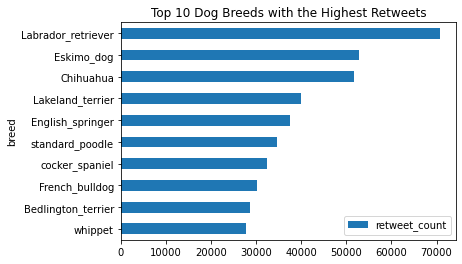

In [62]:
#plotting
breed_retweet_count.plot(x = 'breed', y = 'retweet_count', kind = 'barh', title = "Top 10 Dog Breeds with the Highest Retweets").invert_yaxis()

#### Which dog breeds have the highest number of favorite count?

In [63]:
breed_favorite_count = twitter_weratedogs.nlargest(10, 'favorite_count')[['breed', 'favorite_count']]

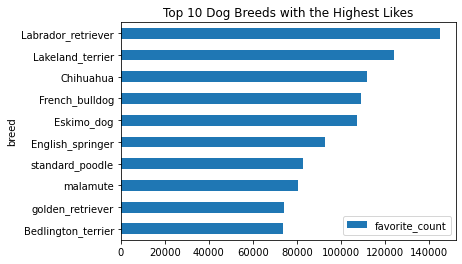

In [64]:
#plotting
breed_favorite_count.plot(x = 'breed', y = 'favorite_count', kind = 'barh', title = "Top 10 Dog Breeds with the Highest Likes").invert_yaxis()

#### Which breeds are top rated (where denominator = 10)

In [65]:
df_twitter = twitter_weratedogs[twitter_weratedogs['rating_denominator'] == 10]
df_topbreed = df_twitter.groupby('breed')['rating_numerator'].mean().sort_values(ascending = False)
print(df_topbreed.head(20))

breed
clumber                    27.000000
None                       14.754144
Bouvier_des_Flandres       13.000000
Pomeranian                 12.775000
Saluki                     12.500000
briard                     12.333333
Tibetan_mastiff            12.250000
Border_terrier             12.142857
kuvasz                     12.058824
standard_schnauzer         12.000000
silky_terrier              12.000000
Irish_setter               11.750000
Gordon_setter              11.750000
Samoyed                    11.731707
Eskimo_dog                 11.650000
chow                       11.600000
golden_retriever           11.585526
giant_schnauzer            11.500000
wire-haired_fox_terrier    11.500000
Australian_terrier         11.500000
Name: rating_numerator, dtype: float64


#### How have tweets fared over time?

In [66]:
import datetime

twitter_weratedogs.timestamp = pd.to_datetime(twitter_weratedogs['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = twitter_weratedogs.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.tail()

timestamp  tweet_id
17 2017-04-30        41
18 2017-05-31        43
19 2017-06-30        43
20 2017-07-31        49
21 2017-08-31         2

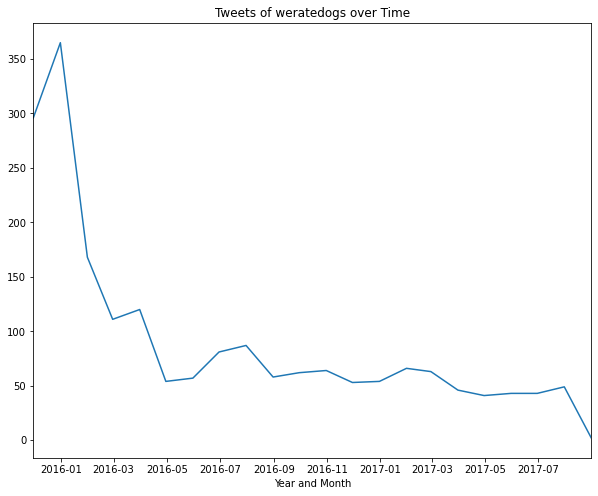

In [67]:
# Plotting tweets over time

plt.figure(figsize=(12, 10))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 31)]) 

plt.xlabel('Year and Month')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id)
plt.title('Tweets of weratedogs over Time');

In [68]:
twitter_weratedogs['name'].value_counts()[1:10]

Cooper     10
Charlie    10
Oliver     10
Lucy        9
Penny       9
Tucker      9
Winston     8
Sadie       8
Daisy       7
Name: name, dtype: int64

#### Which dog types are the most popular

In [69]:
twitter_weratedogs['dog_type'].value_counts()

pupper     222
doggo       71
puppo       27
floofer      3
Name: dog_type, dtype: int64

#### Which dog types have the highest rating?

In [70]:
df_twitter = twitter_weratedogs[twitter_weratedogs['rating_denominator'] == 10]
df_toptype = df_twitter.groupby('dog_type')['rating_numerator'].mean().sort_values(ascending = False)
print(df_toptype.head())

dog_type
floofer    12.666667
puppo      12.111111
doggo      11.614286
pupper     10.625000
Name: rating_numerator, dtype: float64


#### How do retweets and favorite relate?

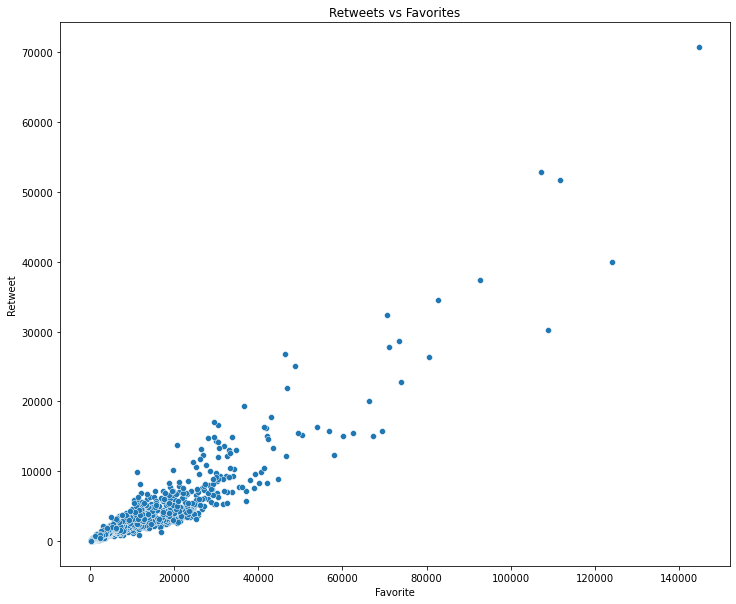

In [71]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = twitter_weratedogs,x = 'favorite_count',y = 'retweet_count')
plt.title('Retweets vs Favorites') #title
plt.xlabel('Favorite') #x label
plt.ylabel('Retweet') #y label
plt.show()

### References

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- https://www.tutorialsteacher.com/python/python-read-write-file#:~:text=To%20open%20a%20file%20in,files%20are%20not%20human%2Dreadable.
- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
- Pandas documentation
- https://docs.python.org/3/library/datetime.html
- https://ipython.org/ipython-doc/3/api/generated/IPython.display.html